# [PREDICTING MOVIE REVENUE (IMDB)](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### Given a data set of the 1,000 most popular movies on IMDB in the last 10 years, can you predict the revenue of a given movie?

Create a user for kaggle if not already done.
<br><br>



### Questions/Exercises:

## 1. Download the data programatically with python. 

(**Hint:** To generate your own kaggle.json file go to *your profile* -> *account* -> *Create new API Token*, and then place the file it in ~/.kaggle/)

In [71]:
#Imports
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kaggle

In [122]:
#Downloading and unzipping the csv-file.
kaggle.api.authenticate()
kaggle.api.dataset_download_files('PromptCloudHQ/imdb-data', path='./', unzip=True)

You will now have to make a train-test-split of the data so that you have a way of verifying the model later. (We suggest 2/3 for training and 1/3 for testing)
	
Here is a link to the [train-test-split documentation for sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## 2. Fit the training-data into a model, present it visually and reflect on whether it is a good fit or not.

In [119]:
data = pd.read_csv("IMDB-Movie-Data.csv")
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [315]:
metascore = data["Metascore"]
revenue = data["Revenue (Millions)"]

data = data[pd.notnull(metascore)]
data = data[pd.notnull(revenue)]

meta_reshape = np.array(metascore).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(meta_reshape, revenue)

model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

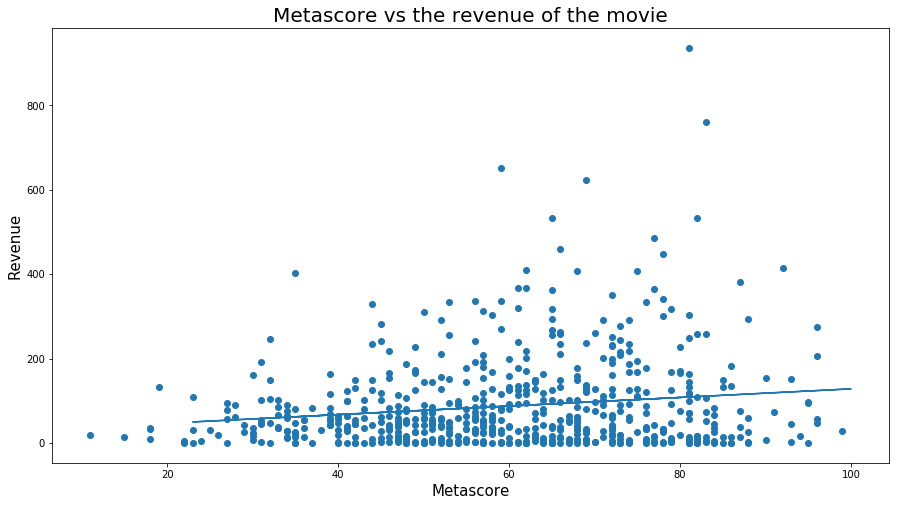

In [316]:
plt.figure(figsize=(15,8))
plt.xlabel("Metascore", size=15)
plt.ylabel("Revenue", size=15)
plt.title("Metascore vs the revenue of the movie", size=20)
plt.scatter(x_train, y_train)

predicted_revenue = model.predict(x_test)

plt.plot(x_test, predicted_revenue)
plt.show()

According to the plot and the predictions from the test data, metascore slightly reflects how much revenue a movie will get as the prediction-line is a bit inclined.
So overall it does not affect the revenue too much, but can still have an impact on some people due to the higher metascore and in the end gain the "moviemakers" some extra coin!

## 3. Now take the test-data, test the model and evaluate how accurate the model is.

In [317]:
model.score(x_train, y_train)

0.02436839701071214

In [318]:
model.score(x_test, y_test)

-0.019461074990676952

In [280]:
test_metascores = [x for x in range(25, 100, 10)]
for x in test_metascores:
    prediction = model.predict([[x]])
    print(f"Revenue prediction for metascore: {x} is {prediction[0]} million")

Revenue prediction for metascore: 25 is 53.35914022252981 million
Revenue prediction for metascore: 35 is 61.84882299047386 million
Revenue prediction for metascore: 45 is 70.33850575841791 million
Revenue prediction for metascore: 55 is 78.82818852636197 million
Revenue prediction for metascore: 65 is 87.31787129430603 million
Revenue prediction for metascore: 75 is 95.80755406225009 million
Revenue prediction for metascore: 85 is 104.29723683019412 million
Revenue prediction for metascore: 95 is 112.78691959813818 million


### Review Questions
1. Was the data downloaded programatically with python?
2. Was the data fitted into the model, presented visually and reflected on?
3. Was the revenue predicted using the model for the given metascores?